# Searching profitable marketing sources for "Yandex afisha"

# Open the data
<a id="start"></a>

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import math
from scipy import stats as st
from IPython.display import display_html
from itertools import chain,cycle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [27]:
visits.head(3)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [28]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [29]:
visits.columns = map(str.lower, visits.columns) #change the register

In [30]:
visits.head(3)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [31]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] # change the coulumns name

In [32]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [33]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
# channge format to date

In [34]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [35]:
orders.head(3)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [36]:
orders.columns = ['buy_ts', 'revenue', 'uid'] # change the coulumns name

In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [38]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts']) #change the format

In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [40]:
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [41]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [42]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [43]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [44]:
visits.duplicated().sum() #check out duplicates

0

In [45]:
orders.duplicated().sum() #check out duplicates

0

In [46]:
costs.duplicated().sum()#check out duplicates

0

# Metrics and histograms
<a id="metrics"></a>

# 2.1 Product metrics
<a id="prod_metrics"></a>

In [47]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
#add columns with year, month, week and date

In [48]:
visits.head(3) 

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01


In [50]:
dau_visits = visits.groupby('session_date').agg({'uid':'nunique'})
wau_visits = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
mau_visits = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})
#group by for dau, wau, mau

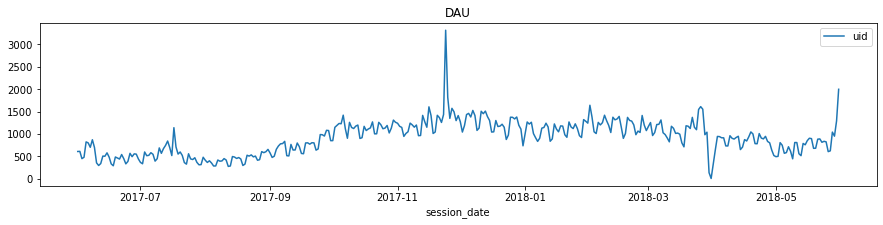

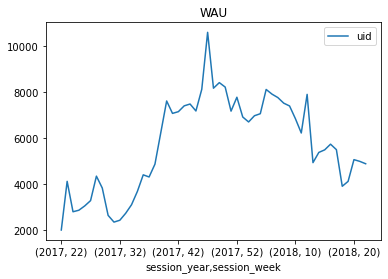

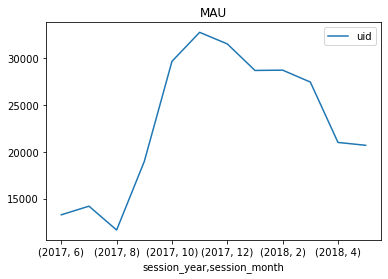

In [51]:
dau_visits.plot(title='DAU', figsize=(15,3))
wau_visits.plot(title='WAU')
mau_visits.plot(title='MAU')
plt.show()

In [52]:
print('DAU за весь период:', int(dau_visits.mean()), 'пользователей')
print('WAU за весь период:', int(wau_visits.mean()), 'пользователей')
print('MAU за весь период:', int(mau_visits.mean()), 'пользователей')

DAU за весь период: 907 пользователей
WAU за весь период: 5716 пользователей
MAU за весь период: 23228 пользователей


In [53]:
users_visit_per_day = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
users_visit_per_day.columns = ['n_sessions', 'n_users']
users_visit_per_day['users_visit'] = users_visit_per_day['n_sessions'] / users_visit_per_day['n_users'] 
#group the data and calculate it

In [54]:
users_visit_per_day 

,n_sessions,n_users,users_visit
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [55]:
users_visit_per_day = users_visit_per_day['users_visit']

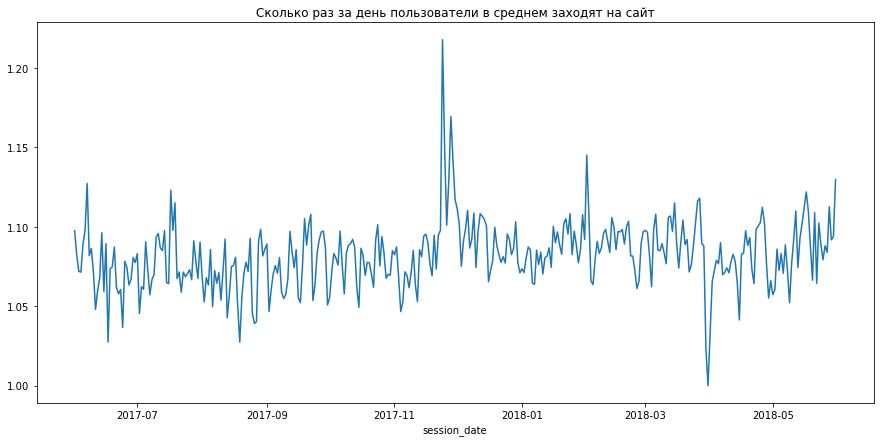

In [57]:
users_visit_per_day.plot(title='Сколько раз за день пользователи в среднем заходят на сайт', figsize=(15,7))
plt.show()

# how frequently do users visit the website

In [59]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds #how many seconds do users stay at the website

In [60]:
visits['session_duration_sec'].mean() 

643.506488592098

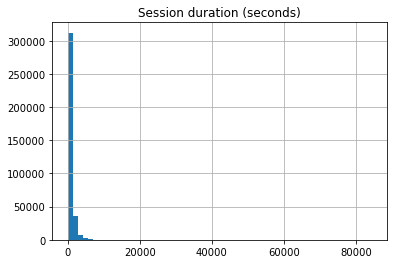

In [62]:
visits['session_duration_sec'].hist(bins=60)
plt.title('Session duration (seconds)')
plt.show()

In [63]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [64]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

In [65]:
first_visits = visits.groupby(['uid'])['start_ts'].min()  
first_visits.name = 'first_visits'
visits = visits.join(first_visits, on='uid')
#group the data and join the tables

In [66]:
visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visits_month'] = visits['first_visits'].astype('datetime64[M]')
#change type of the data

In [67]:
visits['cohort_lifetime'] = visits['visits_month'] - visits['first_visits_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
# calculate in the columns

In [68]:
cohorts = visits.groupby(['first_visits_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visits_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_visits_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
#group the data, filter, join and calculate

In [69]:
retention_pivot = cohorts.pivot_table(
    index='first_visits_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')
#create the pivot table

In [70]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


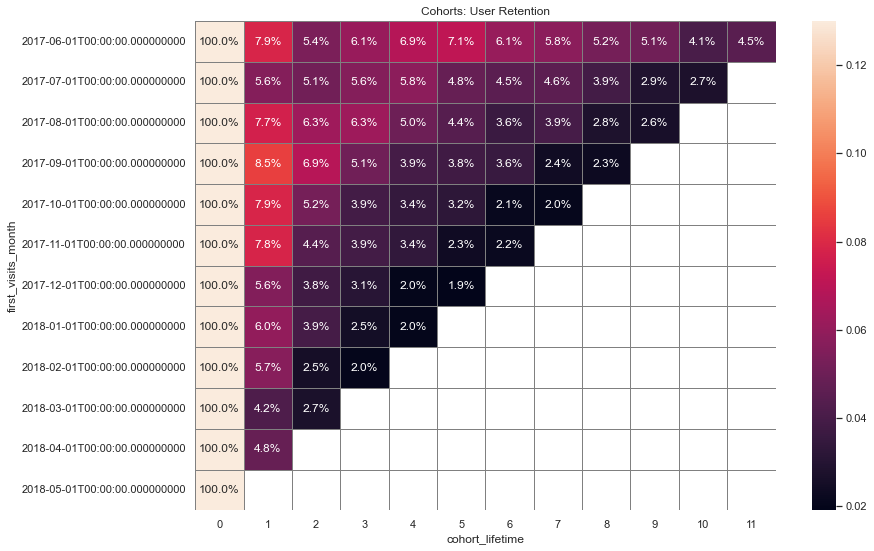

In [71]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.13)
plt.show()

In [72]:
retention_pivot[1].mean() 

0.06516659710392834

**Conclusion for product metrics**
1. Thankfully WAU & MAU could notice a peak of user's activity. It was between forty-two and fifty-two weeks of 2017
2. Users visit the website not more than one time per a day
3. The median time at the website = 643 seconds; as we could see on the histogram, it is unnormal. Mode = 60 seconds
4. Retention rate not perfect, in the second-month average count is 6.5%

# 2.2 E-commerce metrics
<a id="ecom_metrics"></a>

In [73]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [75]:
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
#change types and group the data

In [76]:
first_orders

,uid,first_order_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [77]:
first_orders['first_order_date'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
#add new columns with necessary types

In [78]:
first_orders.head(3)

,uid,first_order_ts,first_order_date,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01


In [79]:
buyers = pd.merge(first_visits, first_orders, on='uid') #join tables

In [80]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                36523 non-null  uint64        
 1   first_visits       36523 non-null  datetime64[ns]
 2   first_order_ts     36523 non-null  datetime64[ns]
 3   first_order_date   36523 non-null  object        
 4   first_order_month  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(1), uint64(1)
memory usage: 1.7+ MB


In [81]:
buyers.head(3)

,uid,first_visits,first_order_ts,first_order_date,first_order_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-11,2017-10-01


In [82]:
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_visits']) / np.timedelta64(1, 'D')).astype('int')
# calculate in the new column

In [83]:
buyers

,uid,first_visits,first_order_ts,first_order_date,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,2017-11-24,2017-11-01,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,2017-11-24,2017-11-01,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,2017-09-22,2017-09-01,0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2018-03-26,2018-03-01,231
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,2018-02-18,2018-02-01,103


In [84]:
buyers['days_to_first_purchase'].median()

0.0

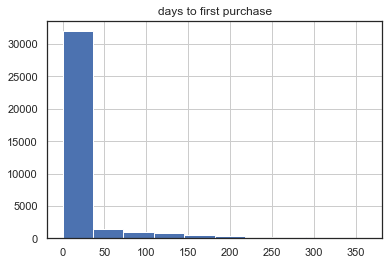

In [85]:
buyers['days_to_first_purchase'].hist(bins = 10)
plt.title('days to first purchase')
plt.show()

In [57]:
buyers['days_to_first_purchase'].mode() 

0    0
dtype: int64

In [86]:
cohort_size = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.rename(columns={'uid': 'n_buyers'}, inplace=True)
#group the data on the first order month

In [87]:
orders.head(3)


,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01


In [88]:
buyers.head(3)

,uid,first_visits,first_order_ts,first_order_date,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-11,2017-10-01,0


In [89]:
cohorts = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue':'count'}).reset_index()
#join tables:orders and buyers and group it

In [90]:
cohorts.head(3)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174


In [94]:
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'n_orders', 'age_month']
#calculate

In [95]:
cohorts_report = pd.merge(cohort_size, cohorts, on='first_order_month') #join tables

In [96]:
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers'] #count orders per user

In [97]:
cohorts_report

,first_order_month,n_buyers,order_month,n_orders,age_month,orders_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0.0,1.163618
1,2017-06-01,2023,2017-07-01,177,1.0,0.087494
2,2017-06-01,2023,2017-08-01,174,2.0,0.086011
3,2017-06-01,2023,2017-09-01,226,3.0,0.111715
4,2017-06-01,2023,2017-10-01,292,4.0,0.144340
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176,2.0,0.049816
75,2018-04-01,2276,2018-04-01,2495,0.0,1.096221
76,2018-04-01,2276,2018-05-01,195,1.0,0.085677
77,2018-05-01,2988,2018-05-01,3249,0.0,1.087349


In [98]:
cohorts_age = cohorts_report.pivot_table(index='first_order_month', columns='age_month', values='orders_per_buyer', aggfunc='sum').cumsum(axis=1) # cтроим сводную таблицу по когортам

In [100]:
cohorts_age.round(2).fillna('') #drop gaps in the table

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [69]:
orders.head(3)

,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01


In [101]:
av_check = orders.groupby('buy_dt').agg({'revenue':'sum', 'uid':'count'}) #group the data

In [102]:
av_check['av_check'] = av_check['revenue'] / av_check['uid'] # count AOV

In [103]:
av_check['av_check'].describe()

count    364.000000
mean       4.936188
std        2.021881
min        1.948000
25%        3.960635
50%        4.561548
75%        5.411037
max       29.133312
Name: av_check, dtype: float64

In [104]:
av_check

,revenue,uid,av_check
buy_dt,,,
2017-06-01,389.46,96,4.056875
2017-06-02,324.11,111,2.919910
2017-06-03,166.48,67,2.484776
2017-06-04,195.21,66,2.957727
2017-06-05,441.49,161,2.742174
...,...,...,...
2018-05-28,740.00,188,3.936170
2018-05-29,491.06,189,2.598201
2018-05-30,1021.69,208,4.911971


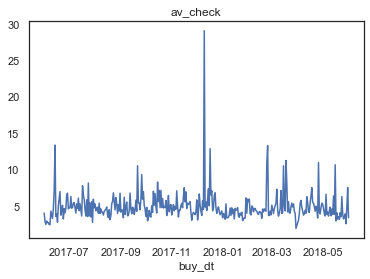

In [106]:
av_check['av_check'].plot()
plt.title('av_check')
plt.show()


In [107]:
av_check['av_check'].mean() #av_check

4.9361875819465615

In [108]:
cohorts = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [109]:
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [110]:
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()   
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']
#calculate and rename the columns

In [111]:
cohorts_report = pd.merge(cohort_size, cohorts, on='first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
# join tables, calculate revenue per buyer

In [112]:
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,rev_per_buyer
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0.0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0.0,4.660562


In [116]:
cohorts_age = cohorts_report.query('age_month <= 6' and 'first_order_month < "2017-12-01"') #filter the data. cohorts more tna 6 month

In [117]:
cohorts_age = cohorts_age.pivot_table(index='first_order_month', columns='age_month', values='rev_per_buyer', aggfunc='sum').cumsum(axis=1)#

In [118]:
cohorts_age.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,,,,,


**Conclusion for E-commerce metrics**
1. Users decided to buy less than one day
2. Average orders per user were in the first (2.19) and third (1.6) cohorts
3. AOV = 4.96, on the median = 4.5, peak were in last month 2017 
4. The best result on LTV is the first and fourth cohorts

# 2.3 Marketing metrics
<a id="mark_metrics"></a>

In [119]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [121]:
costs['costs'].sum() #summ of the marketing costs

329131.62

In [122]:
costs_per_category = costs.groupby('source_id').agg({'costs':'sum'}) #group the data

In [123]:
costs_per_category

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [124]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]') #change type of the column

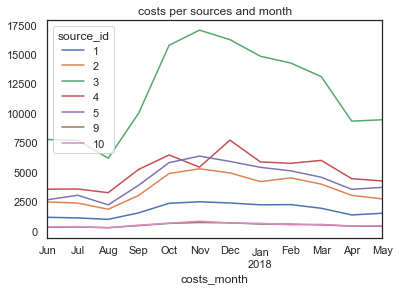

In [125]:
costs.pivot_table(index='costs_month',columns='source_id' ,values='costs', aggfunc='sum').plot()
plt.title('costs per sources and month')
plt.show()

In [126]:
general_cac = costs['costs'].sum() / orders['uid'].nunique()
general_cac
#CAC per 1 user

9.011626098622786

In [127]:
cac_buyers = pd.merge(buyers, visits, on='uid')

In [128]:
cac_buyers.head(2)

,uid,first_visits_x,first_order_ts,first_order_date,first_order_month,days_to_first_purchase,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_sec,first_visits_y,visits_month,first_visits_month,cohort_lifetime
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018,3,10,2018-03-11,360,2017-09-18 22:49:00,2018-03-01,2017-09-01,6
1,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,9,38,2017-09-18,1080,2017-09-18 22:49:00,2017-09-01,2017-09-01,0


In [129]:
buyers.head(2)

,uid,first_visits,first_order_ts,first_order_date,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03,2017-06-01,0


In [130]:
cac_buyers = cac_buyers.groupby(['source_id', 'first_order_date']).agg({'uid':'count'}).reset_index()
cac_buyers.rename(columns={'uid': 'n_buyers'}, inplace=True)

In [131]:
cac_buyers.head(2)

,source_id,first_order_date,n_buyers
0,1,2017-06-01,184
1,1,2017-06-02,120


In [132]:
costs.head(2)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


In [133]:
costs_cac = pd.merge(cac_buyers, costs, on='source_id')

In [134]:
costs_cac.head(3)

,source_id,first_order_date,n_buyers,dt,costs,costs_month
0,1,2017-06-01,184,2017-06-01,75.20,2017-06-01
1,1,2017-06-01,184,2017-06-02,62.25,2017-06-01
2,1,2017-06-01,184,2017-06-03,36.53,2017-06-01


In [136]:
costs_cac['costs_per_buyer'] = costs_cac['costs'] / costs_cac['n_buyers']

In [137]:
costs_cac.head(3)

,source_id,first_order_date,n_buyers,dt,costs,costs_month,costs_per_buyer
0,1,2017-06-01,184,2017-06-01,75.20,2017-06-01,0.408696
1,1,2017-06-01,184,2017-06-02,62.25,2017-06-01,0.338315
2,1,2017-06-01,184,2017-06-03,36.53,2017-06-01,0.198533


In [139]:
costs_cac.pivot_table(index='costs_month', columns='source_id', values='costs_per_buyer', aggfunc='mean')
# create a pivot table with sources and average costs per buyer

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1.860280,3.131085,7.550584,3.354845,2.994436,1.377420,3.378128
2017-07-01,1.715936,2.912406,7.252883,3.260415,3.321000,1.413932,3.431459
2017-08-01,1.522300,2.260722,5.806128,2.971878,2.420606,1.163384,2.419667
2017-09-01,2.482351,3.851213,9.730216,4.955965,4.405763,2.007163,4.952589
2017-10-01,3.703749,6.047982,14.872929,5.930936,6.388473,2.848101,6.525828
2017-11-01,4.041081,6.769000,16.626627,5.143580,7.240046,3.299297,8.518534
2017-12-01,3.744453,6.113892,15.328721,7.094457,6.504913,3.075095,6.719551
2018-01-01,3.496518,5.190080,13.995461,5.387754,5.949962,2.557173,6.391720
2018-02-01,3.903549,6.183713,14.887869,5.841444,6.219290,2.853613,5.539139


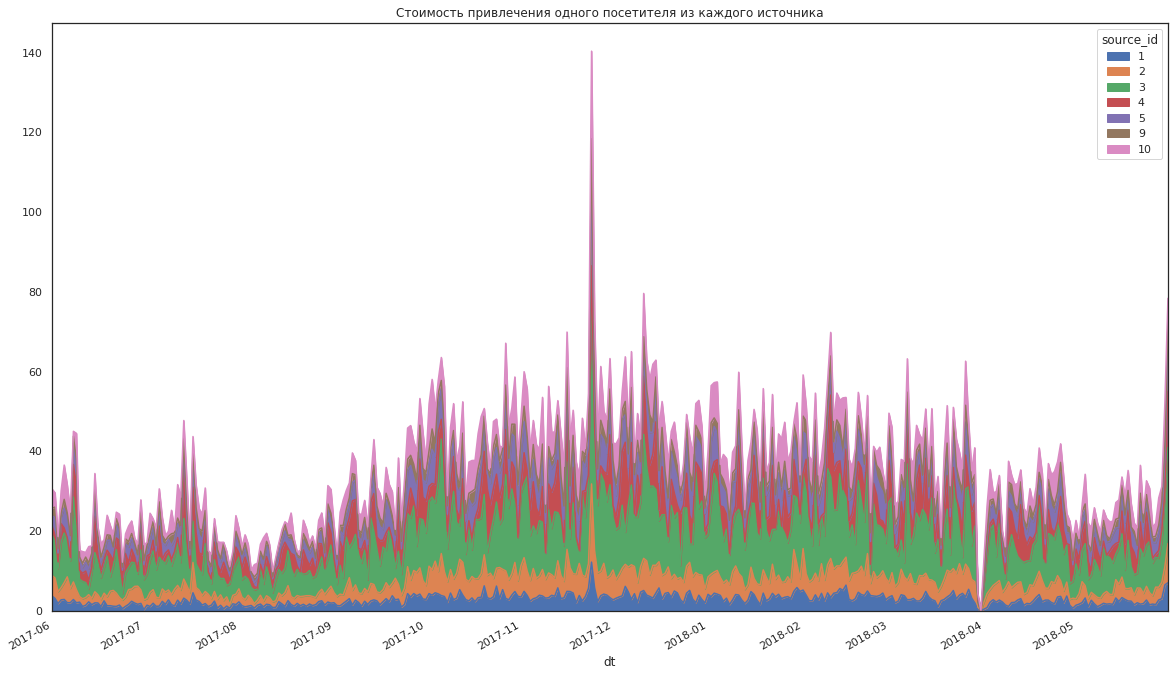

In [102]:
costs_cac.pivot_table(index='dt', columns='source_id', values='costs_per_buyer', aggfunc='mean').plot.area(figsize=(20,12),
title='Стоимость привлечения одного посетителя из каждого источника')

**ROMI**

In [140]:
first_orders1 = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders1.columns = ['uid', 'first_order_ts']
first_orders1['first_order_dt'] = first_orders1['first_order_ts'].dt.date
first_orders1['first_order_month'] = first_orders1['first_order_ts'].astype('datetime64[M]')
first_orders1['first_order_week'] = first_orders1['first_order_ts'].astype('datetime64[W]')
#ещё раз готовим все данные для расчёта, сохраняем в новые переменные, приводим к нужному типу

In [141]:
first_visits1 = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits1.columns = ['uid', 'first_session_start_ts']
first_visits1['first_session_month'] = first_visits1['first_session_start_ts'].astype('datetime64[M]')

In [142]:
buyers1 = pd.merge(first_visits1, first_orders1, on='uid') #соединяем таблицы

In [143]:
buyers1

,uid,first_session_start_ts,first_session_month,first_order_ts,first_order_dt,first_order_month,first_order_week
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-12-28
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-05
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-25
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-23
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,2017-11-23
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,2017-09-21
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,2018-03-22
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,2018-02-15


In [144]:
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]


In [145]:
users

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [146]:
buyers1 = pd.merge(buyers1, users, left_on='uid', right_index=True)

In [147]:
buyers1

,uid,first_session_start_ts,first_session_month,first_order_ts,first_order_dt,first_order_month,first_order_week,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-12-28,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-05,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-25,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-23,5
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,2017-11-23,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,2017-09-21,3
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,2018-03-22,2
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,2018-02-15,3


In [148]:
buyers_daily1 = buyers1.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily1.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily1['first_order_dt'] = pd.to_datetime(buyers_daily1['first_order_dt'])
#группируем дпнные, приводим к нужному типу

In [149]:
buyers_daily1

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [150]:
costs1 = pd.merge(buyers_daily1, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])#соединяем таблицы

In [151]:
costs1['costs_per_buyer'] = costs1['costs']/costs1['n_buyers']

In [152]:
costs1

,source_id,first_order_dt,n_buyers,dt,costs,costs_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111
...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01,4.960000
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01,2.126000
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01,1.617143
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01,6.630000


In [153]:
costs_per_buyer = costs1.groupby('source_id')[['costs_per_buyer']].describe()

In [154]:
costs_per_buyer

costs_per_buyer                                             \
                    count       mean        std       min        25%   
source_id                                                              
1                   361.0   9.489732   7.323941  1.531429   5.158750   
2                   362.0  16.287024  11.634601  1.435876  10.050972   
3                   363.0  15.580474   7.867573  2.412727  10.530686   
4                   362.0   7.271743   6.777558  0.028621   2.526983   
5                   363.0   8.336731   3.946010  2.780909   5.848098   
9                   302.0   6.842532   5.107688  0.473488   3.366250   
10                  320.0   6.555415   6.013867  0.180000   2.504286   

                                             
                 50%        75%         max  
source_id                                    
1           7.561429  11.282857   53.530000  
2          13.310417  19.033750  118.270000  
3          14.503333  18.957233   71.543333  
4           5.508686  10.021972   61.586667  
5           7.468182   9.930114   38.670000  
9           5.512500   8.403750   31.750000  
10          4.800000   8.223125   36.770000

In [155]:
cac = costs_per_buyer['costs_per_buyer']['mean']

In [156]:
cac

source_id
1      9.489732
2     16.287024
3     15.580474
4      7.271743
5      8.336731
9      6.842532
10     6.555415
Name: mean, dtype: float64

In [157]:
ltv = {}

for source, df in buyers1.groupby('source_id'):
    print(source, df.shape)

    cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

    cohorts = pd.merge(orders, df, how='inner', on='uid')\
    .groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': ['sum', 'count']}).reset_index()

    cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']

    cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
    cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

   

    cohorts_age = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='rev_per_buyer', 
        aggfunc='sum'
    ).cumsum(axis=1)
    
    try:
        ltv[source] = cohorts_age[5].mean()
    except KeyError:
        pass
#цикл расчёта LTV

1 (2899, 8)
2 (3506, 8)
3 (10473, 8)
4 (10296, 8)
5 (6931, 8)
7 (1, 8)
9 (1088, 8)
10 (1329, 8)


In [158]:
romi = {k:ltv[k]/v for k,v in cac.items()} #расчёт ROMI

In [159]:
romi

{1: 1.2657457421819363,
 2: 0.9511593517142385,
 3: 0.3677775634836701,
 4: 0.8295644204368435,
 5: 1.1209968406187638,
 9: 0.8498390323500922,
 10: 0.5995554038490195}

In [160]:
romi0 = pd.DataFrame.from_dict( {1: 0.6654018739033167,
 2: 0.3992065058888081,
 3: 0.2956003141021074,
 4: 0.6286097711154494,
 5: 0.5799535720411728,
 9: 0.5858081584642382,
 10: 0.4984912706907305}, orient='index').rename(columns={0:'0.0'})

In [161]:
romi0

,0.0
1,0.665402
2,0.399207
3,0.295600
4,0.628610
5,0.579954
9,0.585808
10,0.498491


In [162]:
romi1 = pd.DataFrame.from_dict( {1: 0.786221116435009,
 2: 0.49885650740536064,
 3: 0.320529227552533,
 4: 0.6678830942353954,
 5: 0.6241159093650204,
 9: 0.6356184856501474,
 10: 0.5177381912912262}, orient='index').rename(columns={0:'1.0'})

romi2 =  pd.DataFrame.from_dict( {1: 0.9349756416631368,
 2: 0.6124141380020057,
 3: 0.326184167198972,
 4: 0.6800255250449717,
 5: 0.6699006222863415,
 9: 0.6696615766605499,
 10: 0.5346483463661063}, orient='index').rename(columns={0:'2.0'})

romi3 =  pd.DataFrame.from_dict( {1: 1.0149230620517968,
 2: 0.7422383148458859,
 3: 0.33782617546064675,
 4: 0.7115818620543294,
 5: 0.9213280941943564,
 9: 0.7458197193591861,
 10: 0.526960583523367}, orient='index').rename(columns={0:'3.0'})

romi4 =  pd.DataFrame.from_dict( {1: 1.1471228968410896,
 2: 0.8474718285178091,
 3: 0.3534212533775898,
 4: 0.7580098153502176,
 5: 1.0131050884675166,
 9: 0.7782139015255438,
 10: 0.5261279662585262}, orient='index').rename(columns={0:'4.0'})


romi5 =  pd.DataFrame.from_dict( {1: 1.265745742181936,
 2: 0.9511593517142385,
 3: 0.3677775634836703,
 4: 0.8295644204368436,
 5: 1.1209968406187643,
 9: 0.8498390323500922,
 10: 0.5995554038490204}, orient='index').rename(columns={0:'5.0'})
#создаем фреймы с ROMI

In [163]:
romi_gen = pd.merge(romi0, romi1, left_index=True, right_index=True) #объединяем их

In [164]:
romi_gen

,0.0,1.0
1,0.665402,0.786221
2,0.399207,0.498857
3,0.295600,0.320529
4,0.628610,0.667883
5,0.579954,0.624116
9,0.585808,0.635618
10,0.498491,0.517738


In [165]:
romi_gen = romi_gen.merge(romi2, left_index=True, right_index=True)
romi_gen = romi_gen.merge(romi3, left_index=True, right_index=True)
romi_gen = romi_gen.merge(romi4, left_index=True, right_index=True)
romi_gen = romi_gen.merge(romi5, left_index=True, right_index=True)
#соединяем оставшиеся ROMI друг с другом

In [166]:
romi_gen

,0.0,1.0,2.0,3.0,4.0,5.0
1,0.665402,0.786221,0.934976,1.014923,1.147123,1.265746
2,0.399207,0.498857,0.612414,0.742238,0.847472,0.951159
3,0.295600,0.320529,0.326184,0.337826,0.353421,0.367778
4,0.628610,0.667883,0.680026,0.711582,0.758010,0.829564
5,0.579954,0.624116,0.669901,0.921328,1.013105,1.120997
9,0.585808,0.635618,0.669662,0.745820,0.778214,0.849839
10,0.498491,0.517738,0.534648,0.526961,0.526128,0.599555


**Conclusion for marketing metrics**
1. The summary cost of an advertising campaign is 329 thousand. Source #3 is a leader (141 thousand), sources #4(61 thousand) and #5 (51 thousand)
2. The average CAC per user is 9 с.u. But in some sources average count is more than usual (like 14, 15, 16 c.u.)
3. The best profitable source is #1, but #5 has a prospect